**Chronic Kidney Disease Analysis - CO544 Group project**


---
This is Group project under CO544 -  Machine Learning & Data mining course. Here we using Data set Chronic Kidney disease. The objective is this project to develop a model & predict patient is CKD or Non CKD from data from patient


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import needed libraries
import pandas as pd
import numpy as np
import logging
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
#Load the data set
pd.set_option('display.min_rows',400)
column_list= ['age', 'bp', 'sg','al', 'su','rbc','pc','pcc','ba','bgr','bu','sc','sod','pot','hemo','pcv','wbcc','rbcc','htn','dm','cad','appet','pe','ane','class']
df=pd.read_csv('/content/drive/My Drive/CO544/Project/Data.csv',names=column_list)
df1=df
df.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
count,400,400,400,400,400,400,400,400,400,400,400,400,400,400,400,400,400,400,400,399,400,400,400,400,400
unique,77,11,6,7,7,3,3,3,3,147,119,87,35,43,119,45,93,50,3,6,4,4,4,3,4
top,60,80,1.020,0,0,normal,normal,notpresent,notpresent,?,?,1.2,?,?,?,?,?,?,no,no,no,good,no,no,ckd
freq,19,116,106,199,290,201,259,354,374,44,19,40,87,88,52,70,105,130,251,257,362,316,322,339,248


In [ ]:
#see the value in each feature and identify the places where to refine
for col in column_list:
    print('{} has {} values '.format(col,df[col].unique()))
    print('\n')

age has ['48' '7' '62' '51' '60' '68' '24' '52' '53' '50' '63' '40' '47' '61' '21'
 '42' '75' '69' '?' '73' '70' '65' '76' '72' '82' '46' '45' '35' '54' '11'
 '59' '67' '15' '55' '44' '26' '64' '56' '5' '74' '38' '58' '71' '34' '17'
 '12' '43' '41' '57' '8' '39' '66' '81' '14' '27' '83' '30' '4' '3' '6'
 '32' '80' '49' '90' '78' '19' '2' '33' '36' '37' '23' '25' '20' '29' '28'
 '22' '79'] values 


bp has ['80' '50' '70' '90' '?' '100' '60' '110' '140' '180' '120'] values 


sg has ['1.020' '1.010' '1.005' '1.015' '?' '1.025'] values 


al has ['1' '4' '2' '3' '0' '?' '5'] values 


su has ['0' '3' '4' '1' '?' '2' '5'] values 


rbc has ['?' 'normal' 'abnormal'] values 


pc has ['normal' 'abnormal' '?'] values 


pcc has ['notpresent' 'present' '?'] values 


ba has ['notpresent' 'present' '?'] values 


bgr has ['121' '?' '423' '117' '106' '74' '100' '410' '138' '70' '490' '380' '208'
 '98' '157' '76' '99' '114' '263' '173' '95' '108' '156' '264' '123' '93'
 '107' '159' '140' '171' '

In [ ]:
#replacing ? with NaN to handle the null easily and also correct other wrong input value due to indentation error
df = df.replace("?", np.nan)
df = df.replace("	?", np.nan)
df = df.replace(" yes", "yes")
df = df.replace("\tyes", "yes")
df = df.replace("	no", "no")
df = df.replace("ckd\t", "ckd")

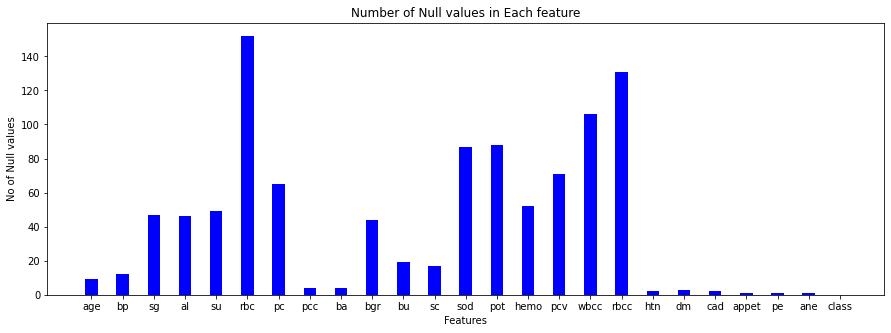

In [ ]:
#Count total NaN at each column in DataFrame
null_values = df.isnull().sum()
fig_ = plt.figure(figsize = (15,5))
plt.bar(column_list, null_values, color ='blue', width = 0.4)
plt.xlabel('Features')
plt.ylabel('No of Null values')
plt.title("Number of Null values in Each feature")
plt.show()

In [ ]:
#converting in to float data type to take off error input like \t1.20 or 1.20\t where the value need to be 1.20
df['age']=df['age'].astype(float)
df['bp']=df['bp'].astype(float)
df['sg']=df['sg'].astype(float)
df['al']=df['al'].astype(float)
df['su']=df['su'].astype(float)
df['bgr']=df['bgr'].astype(float)
df['bu']=df['bu'].astype(float)
df['sc']=df['sc'].astype(float)
df['sod']=df['sod'].astype(float)
df['pot']=df['pot'].astype(float)
df['hemo']=df['hemo'].astype(float)
df['pcv']=df['pcv'].astype(float)
df['rbcc']=df['rbcc'].astype(float)
df['wbcc']=df['wbcc'].astype(float)

#change the dtype to catogery where columns have 1 or 0 or NaN
#categoricalColumns = ["sg","al","su","rbc","pc","pcc","ba","htn","dm","cad","appet","pe","ane","class"]
#for var in categoricalColumns:
#    df[var]=df[var].astype(float)

In [ ]:
#get idea about the data set
cat_col=[col for col in df.columns if df[col].dtype=='object']
num_col=[col for col in df.columns if df[col].dtype!='object']
num_col1=num_col
num_col1.append('class')

In [ ]:
for col in cat_col:
    print('{} has {} values '.format(col,df[col].unique()))
    print('\n')

rbc has [nan 'normal' 'abnormal'] values 


pc has ['normal' 'abnormal' nan] values 


pcc has ['notpresent' 'present' nan] values 


ba has ['notpresent' 'present' nan] values 


htn has ['yes' 'no' nan] values 


dm has ['yes' 'no' nan] values 


cad has ['no' 'yes' nan] values 


appet has ['good' 'poor' nan 'no'] values 


pe has ['no' 'yes' nan 'good'] values 


ane has ['no' 'yes' nan] values 


class has ['ckd' 'notckd' 'no'] values 




In [ ]:
#Replace yes to 1 and no to 0 
df[['htn','dm','cad','ane']] = df[['htn','dm','cad','ane']].replace(to_replace={'yes':1,'no':0})
#when proccesing data find that pe has value of good and assume good as yes
df[['pe']] = df[['pe']].replace(to_replace={'good':1,'yes':1,'no':0})
#Replace abnormal to 1 and normal to 1
df[['rbc','pc']] = df[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})
#Replace present with 1 and notpresent with 0
df[['pcc','ba']] = df[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})
#Replace good with 1 and Replace poor with 0
df[['appet']] = df[['appet']].replace(to_replace={'good':1,'poor':0,'no':np.nan})
#Replace ckd with 1 and notckd with 0
df['class'] = df['class'].replace(to_replace={'ckd':1.0,'ckd\t':1.0,'notckd':0.0,'no':0.0})
print("done")
df1=df

done


When considering null value

these has more than 100 null value (25%)

rbc -152 which has 0,1 values

rbc - 131 which has 50 unique values



In [ ]:
df.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
count,391.000000,388.000000,353.000000,354.000000,351.000000,248.000000,335.000000,396.000000,396.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000,398.000000,397.000000,398.000000,398.000000,399.000000,399.000000,400.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,0.189516,0.226866,0.106061,0.055556,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435,0.369347,0.345088,0.085427,0.793970,0.192982,0.150376,0.625000
std,17.169714,13.683637,0.005717,1.352679,1.099191,0.392711,0.419431,0.308305,0.229351,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323,0.483235,0.475997,0.279868,0.404961,0.395135,0.357888,0.484729
min,2.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


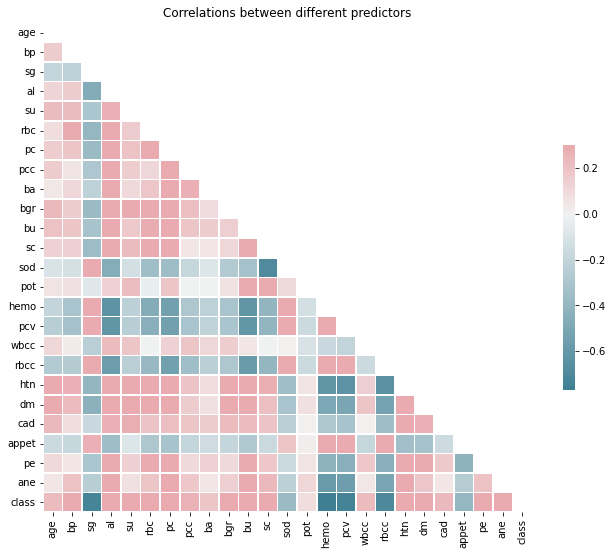

In [ ]:
corr_df = df.corr()
corr_dfN = df[num_col].corr()
corr_dfC = df[cat_col].corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_df, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlations between different predictors')
plt.show()

In [ ]:
data = df


In [ ]:
df = df.drop("rbc", axis =1)

KeyError: ignored

In [ ]:
def Random_Fill(feature):
    random_sample = data[feature].dropna().sample(data[feature].isnull().sum())
    random_sample.index =  data[data[feature].isnull()].index
    data.loc[data[feature].isnull(),feature] = random_sample

In [ ]:
def MSF_Fill(feature):
    mode = data[feature].mode()[0]
    data[feature] = data[feature].fillna(mode)

In [ ]:
def Mean_Fill(feature):
  mean = data[feature].mean()
  data[feature] =  data[feature].fillna(mean)

**Handling the null values**

***First look at rbc which has 152 null values*** 

Decided to take 152 random sample which havent any null value and replace the to indexes where have 152 null values in rbc.

But then decided to drop rcb becuse of few reasons

after filling nul with median the corelation change .56 to 0.28 
after willing with random 152 non null sample it changes to 0,56 to 0.31 its not a good change nearly 40% correlation change there fore I decided to drop the rbc feature wich has 152 null values.
 

***pc has 65 null values ***

 decided to do the same method done the same method done to rbc

 ***other catageric features has less than 10 null  ***

 There for decided to fill them with most frequent value

**then look at numerical value columns**

decided to fill with takig random data from the data becuase there are more than 10 null values in numerical. and also the frequencies of the value have close result for msf.

In [ ]:
#Catogerical data fill for null values
#use random rill to rbc and pc
#Random_Fill('rbc')
#data['rbc'] = data['rbc'].fillna(0)
#cat_col.remove('rbc')
#Random_Fill('pc')
#use Most Frequency to other ones
for col in cat_col:
    MSF_Fill(col)

In [ ]:
#Numerical data fill for null values
for col in num_col:
  Mean_Fill(col)

In [ ]:
data.isnull().sum()

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

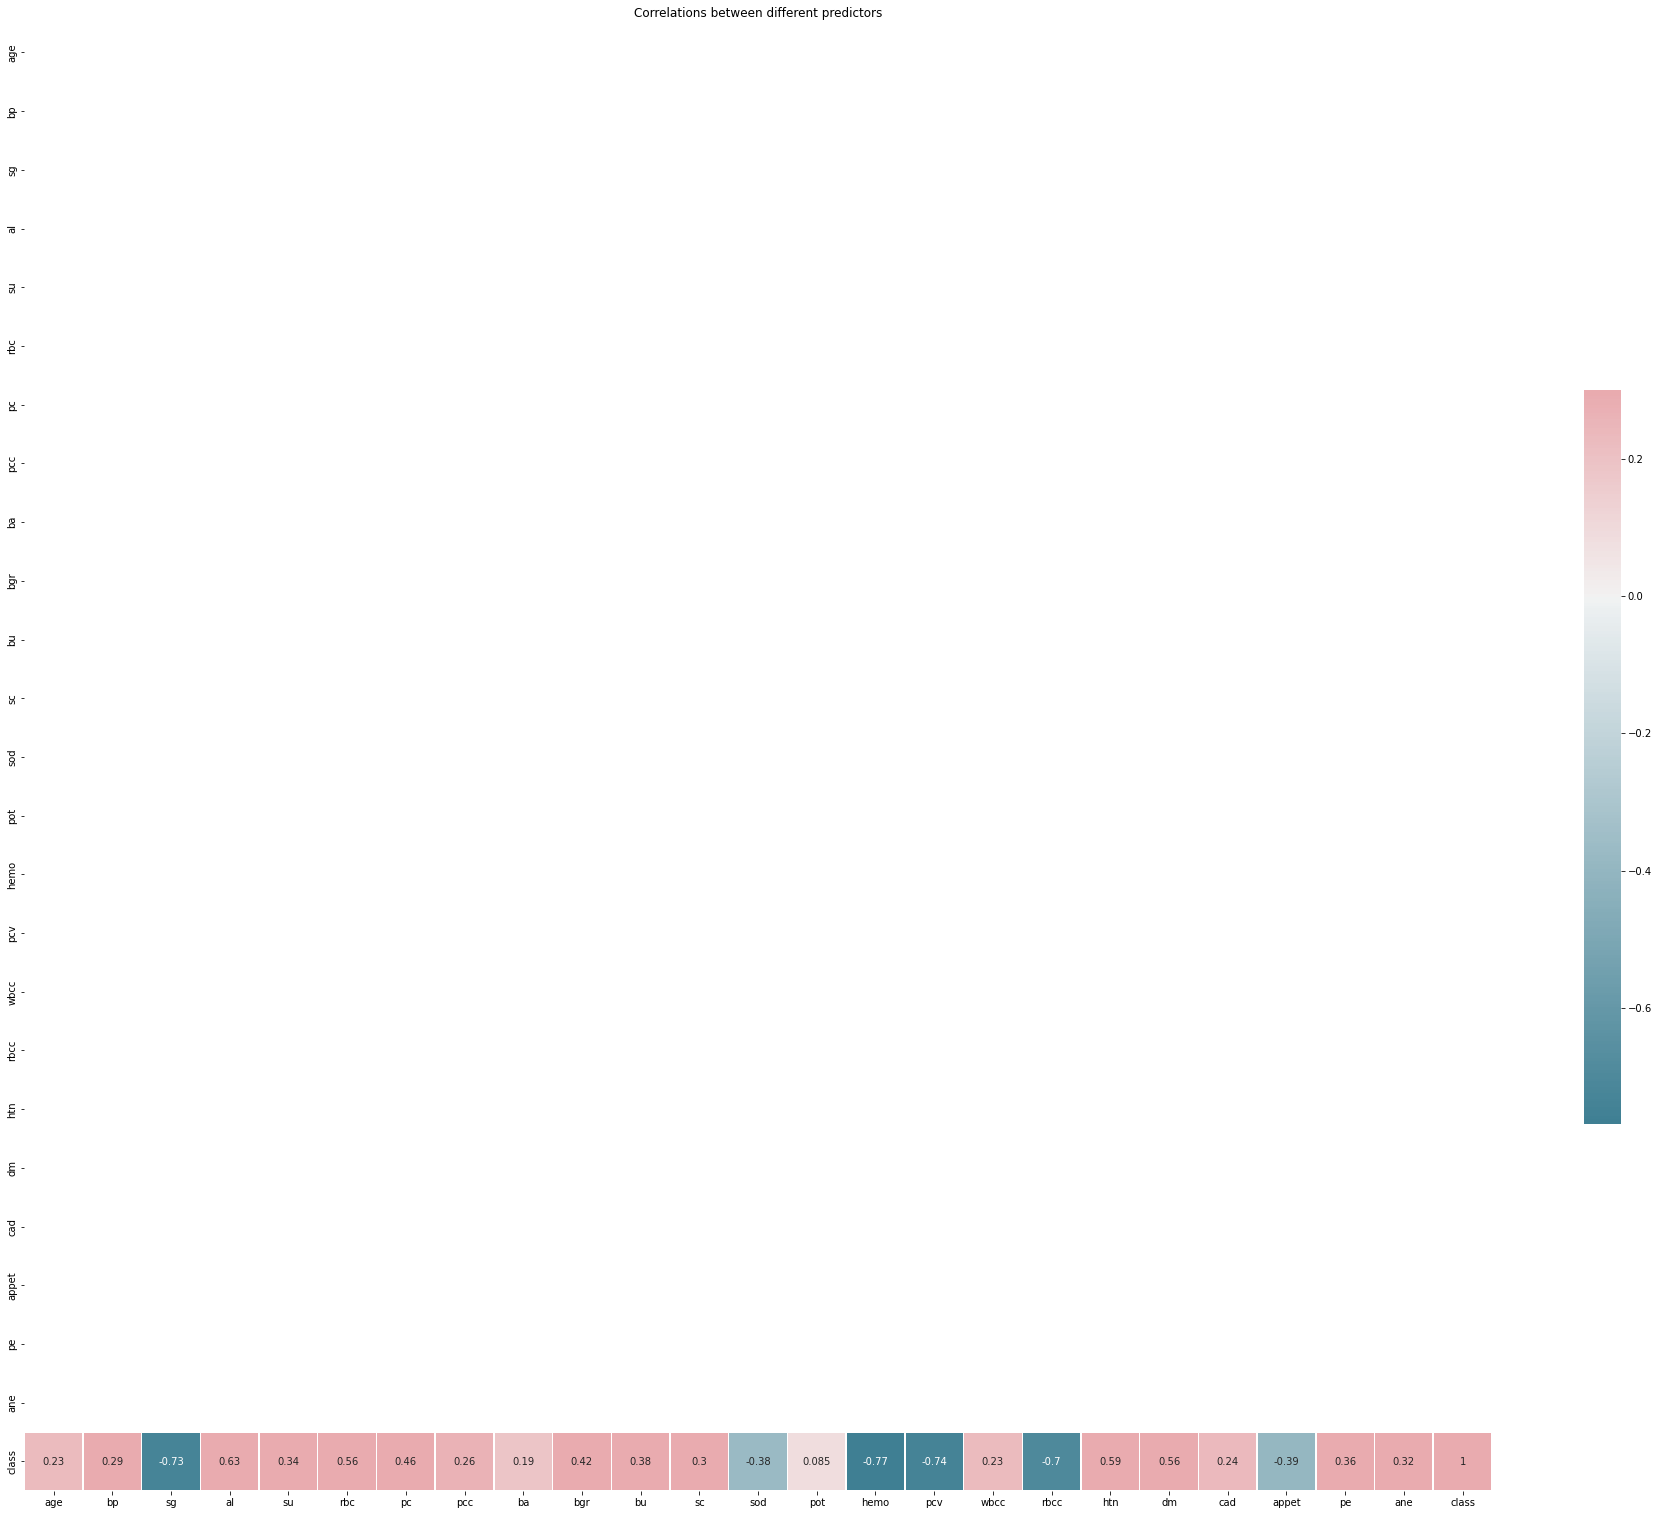

In [ ]:
corr_data = data.corr()
corr_dataN = data[num_col].corr()
corr_dataC = data[cat_col].corr()
# Generate a mask for the upper triangle
mask = np.ones((25,25), dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True
for i in range(25):
  mask[24,i]=False# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(33, 27))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_df, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot= True)
plt.title('Correlations between different predictors')
plt.show()

In [ ]:
print(mask)

[[ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True]
 [ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True]
 [ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True]
 [ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True]
 [ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True]
 [ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True]
 [ True  True  True  True  True  True  True  True  True  T

Text(0.5, 1.0, 'Percentage of differnce in correlation after the null value handling with original')

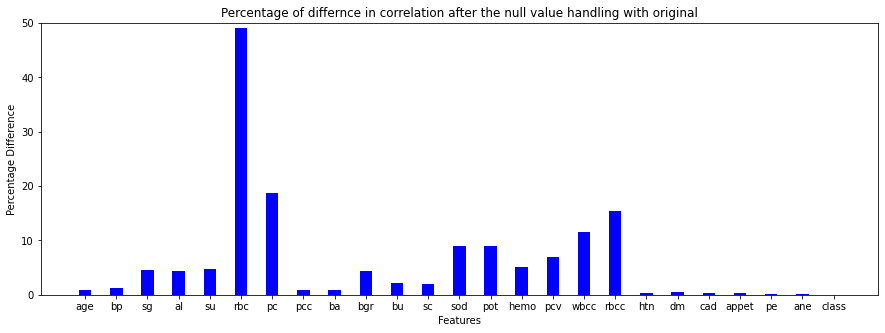

In [ ]:
#pecentage change of correlations after handling null values
percentages=abs((corr_data-corr_df)/corr_df)*100
Perc = percentages['class']
fig_perc = plt.figure(figsize = (15,5))
plt.ylim(0,50)
plt.bar(column_list, Perc, color ='blue', width = 0.4)
plt.xlabel('Features')
plt.ylabel('Percentage Difference')
plt.title("Percentage of differnce in correlation after the null value handling with original")

Text(0.5, 1.0, 'Percentage of differnce in correlation after the null value handling with original - Numerical Val - Mean Value')

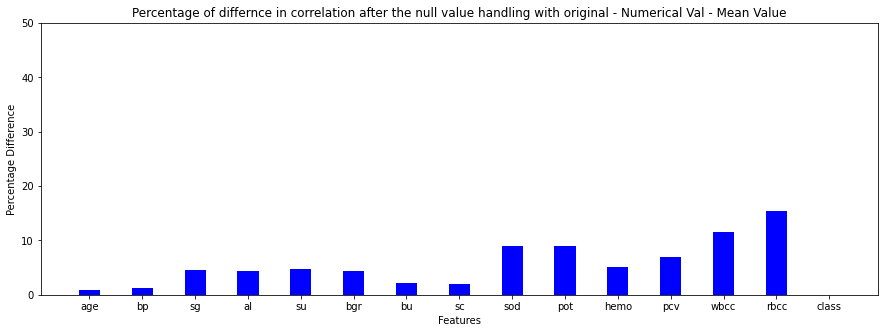

In [ ]:
#pecentage change of correlations after handling null values
percentages=abs((corr_dataN-corr_dfN)/corr_dfN)*100
Perc = percentages['class']
fig_perc = plt.figure(figsize = (15,5))
plt.ylim(0,50)
plt.bar(num_col1, Perc, color ='blue', width = 0.4)
plt.xlabel('Features')
plt.ylabel('Percentage Difference')
plt.title("Percentage of differnce in correlation after the null value handling with original - Numerical Val - Mean Value")

Text(0.5, 1.0, 'Percentage of differnce in correlation after the null value handling with original - Catogerical Values - MSF Fill')

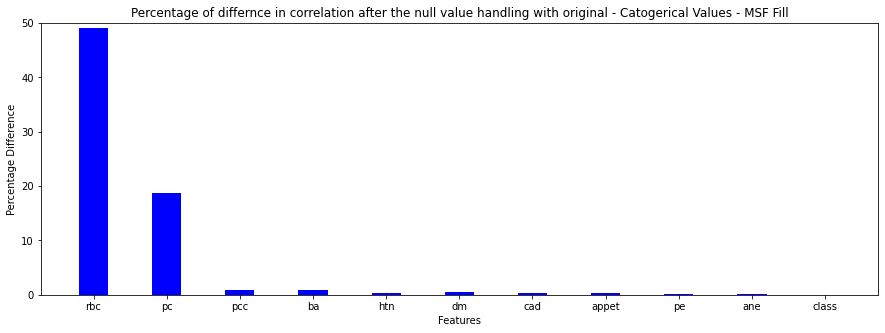

In [ ]:
#pecentage change of correlations after handling null values
percentages=abs((corr_dataC-corr_dfC)/corr_dfC)*100
Perc = percentages['class']
fig_perc = plt.figure(figsize = (15,5))
plt.ylim(0,50)
plt.bar(cat_col, Perc, color ='blue', width = 0.4)
plt.xlabel('Features')
plt.ylabel('Percentage Difference')
plt.title("Percentage of differnce in correlation after the null value handling with original - Catogerical Values - MSF Fill")

In [ ]:
#differance between correlations
diff=(corr_data-corr_df)
diff['class']

age     -0.001862
bp      -0.003477
sg       0.033206
al      -0.027851
su      -0.016258
rbc     -0.272454
pc      -0.086658
pcc      0.002087
ba       0.001525
bgr     -0.018299
bu      -0.008572
sc      -0.005890
sod      0.033386
pot     -0.007620
hemo     0.039291
pcv      0.051367
wbcc    -0.026645
rbcc     0.108175
htn      0.001617
dm       0.002435
cad      0.000936
appet   -0.001397
pe       0.000709
ane      0.000608
class    0.000000
Name: class, dtype: float64

In [ ]:
corr_df['class']

age      0.227268
bp       0.294077
sg      -0.732163
al       0.627090
su       0.344070
rbc      0.555097
pc       0.461812
pcc      0.263226
ba       0.185345
bgr      0.419672
bu       0.380605
sc       0.299969
sod     -0.375674
pot      0.084541
hemo    -0.768919
pcv     -0.741427
wbcc     0.231919
rbcc    -0.699089
htn      0.588820
dm       0.556624
cad      0.235153
appet   -0.391944
pe       0.364391
ane      0.324787
class    1.000000
Name: class, dtype: float64

In [ ]:
(corr_data)['class']


age      0.225405
bp       0.290600
sg      -0.698957
al       0.599238
su       0.327812
rbc      0.282642
pc       0.375154
pcc      0.265313
ba       0.186871
bgr      0.401374
bu       0.372033
sc       0.294079
sod     -0.342288
pot      0.076921
hemo    -0.729628
pcv     -0.690060
wbcc     0.205274
rbcc    -0.590913
htn      0.590438
dm       0.559060
cad      0.236088
appet   -0.393341
pe       0.365101
ane      0.325396
class    1.000000
Name: class, dtype: float64

In [ ]:
from sklearn.preprocessing import LabelEncoder
Label_Encoder = LabelEncoder()
for col in cat_col:
    data[col]=Label_Encoder.fit_transform(data[col])

In [ ]:
data.dtypes

age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc        int64
pc         int64
pcc        int64
ba         int64
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn        int64
dm         int64
cad        int64
appet      int64
pe         int64
ane        int64
class      int64
dtype: object

In [ ]:
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,0,0,0,0,121.000000,36.0,1.2,137.528754,4.627244,15.4,44.0,7800.0,5.200000,1,1,0,1,0,0,1
1,7.0,50.0,1.020,4.0,0.0,0,0,0,0,148.036517,18.0,0.8,137.528754,4.627244,11.3,38.0,6000.0,4.707435,0,0,0,1,0,0,1
2,62.0,80.0,1.010,2.0,3.0,0,0,0,0,423.000000,53.0,1.8,137.528754,4.627244,9.6,31.0,7500.0,4.707435,0,1,0,0,0,1,1
3,48.0,70.0,1.005,4.0,0.0,0,1,1,0,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,3.900000,1,0,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,0,0,0,0,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.0,7300.0,4.600000,0,0,0,1,0,0,1


# **KNN Classifier**

In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop("class", axis=1)
y = data["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Accuracy from KNN: 78.7500%
log_loss: 
 7.339519968822154


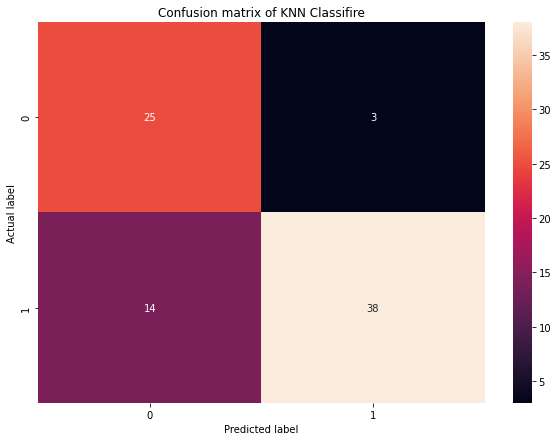

In [ ]:
#KNN model
KNN_Classifier =  KNeighborsClassifier(1)
KNN_Classifier.fit(X_train, y_train)
KNN_Predictions = KNN_Classifier.predict(X_test)
KNN_Acc = accuracy_score(y_test, KNN_Predictions)
print("Accuracy from KNN: {:.4%}".format(KNN_Acc))
KNN_ConMatrix = confusion_matrix(y_test, KNN_Predictions)
print("log_loss: \n",log_loss(y_test, KNN_Predictions))
plt.figure(figsize = (10,7))
sns.heatmap(KNN_ConMatrix, annot=True)
plt.title('Confusion matrix of KNN Classifier', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
def KNN_Graph(n):
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.metrics import accuracy_score, log_loss
  from sklearn.metrics import confusion_matrix
  No_of_neigbours = list(range(0,n+1))
  acc = [0]
  for i in range(1,n+1):
    KNN_Classifier =  KNeighborsClassifier(i)
    KNN_Classifier.fit(X_train, y_train)
    KNN_Predictions = KNN_Classifier.predict(X_test)
    KNN_Acc = accuracy_score(y_test, KNN_Predictions)
    #print("Accuracy from KNN: {:.4%}".format(KNN_Acc))
    acc.append(KNN_Acc*100)
  plt.figure(figsize = (10,7))
  plt.ylim(50,100)
  plt.plot(No_of_neigbours,acc, marker='o')
  plt.xlabel('No of neigbours')
  plt.ylabel('Accuracy')
  plt.title("Change of accuracy with number of Neigbours")
  plt.show()

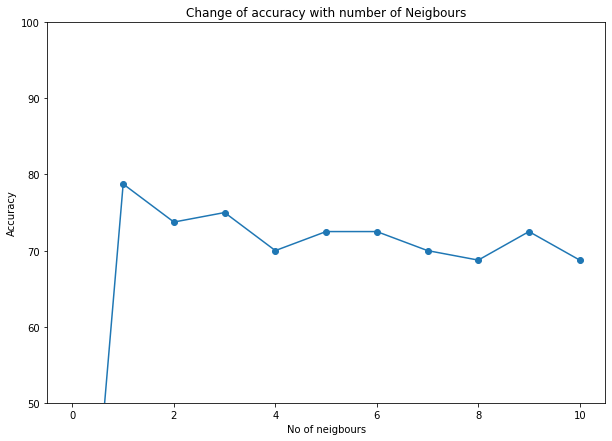

In [ ]:
KNN_Graph(10)

# **Random ForesrClassifier**

Random forests is a supervised learning algorithm. It can be used both for classification and regression. It is also the most flexible and easy to use algorithm. A forest is comprised of trees. It is said that the more trees it has, the more robust a forest is. Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting. It also provides a pretty good indicator of the feature importance.

Random forests has a variety of applications, such as recommendation engines, image classification and feature selection. It can be used to classify loyal loan applicants, identify fraudulent activity and predict diseases. It lies at the base of the Boruta algorithm, which selects important features in a dataset.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#initialise the random forest Model
random_forest_model = RandomForestClassifier(random_state = 0)

#defining the random forest parameters for grid search
rf_parameters_grid = {'n_estimators': [10, 30, 40, 50, 60, 70, 80, 90, 100], 
                      'criterion': ['gini', 'entropy'],
                      'min_samples_split': [1.0, 2, 3, 4, 5], 
                      'max_features': ['auto', 'sqrt', 'log2']}

#apply exhaustice gridsearch to find the optimal solution
rf_grid_search = GridSearchCV(random_forest_model, rf_parameters_grid, scoring = 'accuracy')
#fit the data to the grid
rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                

The best parameters are:
 {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 80}

The best model after gridsearch is:
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Precision: 1.0
Accuracy: 1.0
Recall: 1.0
F1-score: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        52

    accuracy                           1.00        80
   ma

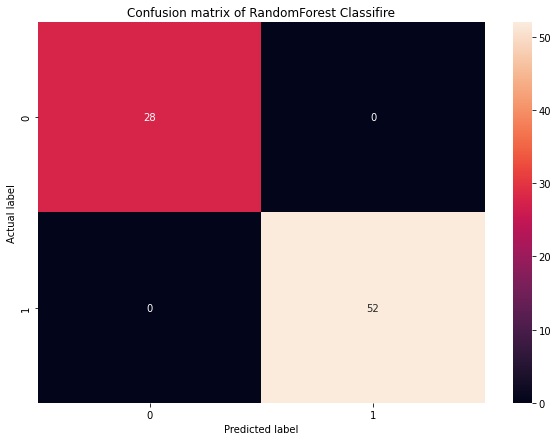

In [ ]:

#print which are best parameters after gridsearch
print('The best parameters are:\n ' +str(rf_grid_search.best_params_))

#print the best model after gridsearch
print('\nThe best model after gridsearch is:\n ' + str(rf_grid_search.best_estimator_))

#Random Forest predictions on test features
rf_prediction = rf_grid_search.predict(X_test)

#display KNN classification Metrices for Decision Tree
print('\nPrecision: ' + str(metrics.precision_score(y_test, rf_prediction)))
print('Accuracy: ' + str(metrics.accuracy_score(y_test, rf_prediction)))
print('Recall: ' + str(metrics.recall_score(y_test, rf_prediction)))
print('F1-score: ' + str(metrics.f1_score(y_test, rf_prediction)))

#display classification report for Decision Tree
print('\nClassification Report:\n' + str(metrics.classification_report(y_test, rf_prediction)))

#display confusion matrix
print('\nConfusion Matrix: \n' + str(metrics.confusion_matrix(y_test, rf_prediction)))
#plot confusion matrix
plt.figure(figsize = (10,7))
sns.heatmap(metrics.confusion_matrix(y_test, rf_prediction), annot = True)
plt.title('Confusion matrix of RandomForest Classifier', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# **Decision tree clasifier**
A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in recursively manner call recursive partitioning. This flowchart-like structure helps you in decision making. It's visualization like a flowchart diagram which easily mimics the human level thinking. That is why decision trees are easy to understand and interpret.


In [ ]:
from sklearn.tree import DecisionTreeClassifier

#initialise the decision tree Model
decision_tree_model = DecisionTreeClassifier(random_state = 0)

#defining the decision tree parameters for grid search
dt_parameters_grid = {'criterion': ['gini', 'entropy'], 
                      'splitter': ['best', 'random'], 
                      'min_samples_leaf': [1, 2, 3, 4, 5], 
                      'max_features': ['auto', 'sqrt', 'log2']}

#apply exhaustice gridsearch to find the optimal solution
dt_grid_search = GridSearchCV(decision_tree_model, dt_parameters_grid, scoring = 'accuracy')
#fit the data to the grid
dt_grid_search.fit(X_train, y_train)



GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2']

The best parameters are:
 {'criterion': 'gini', 'max_features': 'auto', 'min_samples_leaf': 1, 'splitter': 'random'}

The best model after gridsearch is:
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='random')

Precision: 0.98
Accuracy: 0.95
Recall: 0.9423076923076923
F1-score: 0.9607843137254902

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        28
           1       0.98      0.94      0.96        52

    accuracy                           0.95        80
   macro avg       0.94      0.95      0.95        80
weighted avg       0.95      0.95

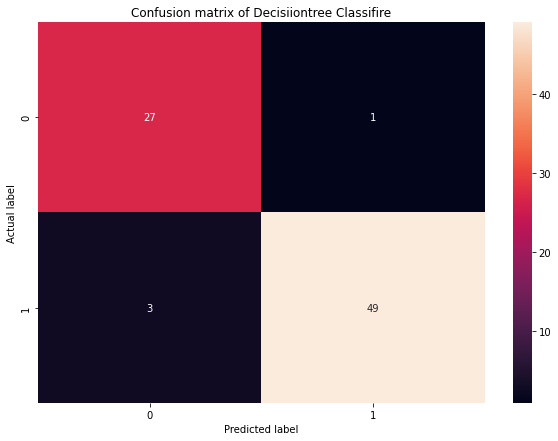

In [ ]:
#print which are best parameters after gridsearch
print('The best parameters are:\n ' +str(dt_grid_search.best_params_))

#print the best model after gridsearch
print('\nThe best model after gridsearch is:\n ' + str(dt_grid_search.best_estimator_))

#Decision Tree predictions on test features
dt_prediction = dt_grid_search.predict(X_test)

#display KNN classification Metrices for Decision Tree
print('\nPrecision: ' + str(metrics.precision_score(y_test, dt_prediction)))
print('Accuracy: ' + str(metrics.accuracy_score(y_test, dt_prediction)))
print('Recall: ' + str(metrics.recall_score(y_test, dt_prediction)))
print('F1-score: ' + str(metrics.f1_score(y_test, dt_prediction)))

#display classification report for Decision Tree
print('\nClassification Report:\n' + str(metrics.classification_report(y_test, dt_prediction)))

#display confusion matrix
print('\nConfusion Matrix: \n' + str(metrics.confusion_matrix(y_test, dt_prediction)))
#plot confusion matrix
plt.figure(figsize = (10,7))
sns.heatmap(metrics.confusion_matrix(y_test, dt_prediction), annot = True)
plt.title('Confusion matrix of DTC Classifier', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# **Support Vector machine**

In [ ]:
from sklearn.svm import SVC

#initialise the Support Vector Model
svm_grid_search = SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

svm_grid_search.fit(X_train, y_train)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)


Precision: 0.9807692307692307
Accuracy: 0.975
Recall: 0.9807692307692307
F1-score: 0.9807692307692307

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        28
           1       0.98      0.98      0.98        52

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80


Confusion Matrix: 
[[27  1]
 [ 1 51]]


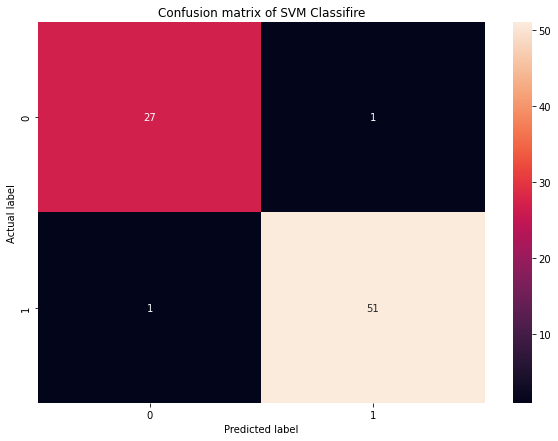

In [ ]:


#svm predictions on test features
svm_prediction = svm_grid_search.predict(X_test)

#display SVM classification Metrices for SVM
print('\nPrecision: ' + str(metrics.precision_score(y_test, svm_prediction)))
print('Accuracy: ' + str(metrics.accuracy_score(y_test, svm_prediction)))
print('Recall: ' + str(metrics.recall_score(y_test, svm_prediction)))
print('F1-score: ' + str(metrics.f1_score(y_test, svm_prediction)))

#display classification report for SVM
print('\nClassification Report:\n' + str(metrics.classification_report(y_test, svm_prediction)))

#display confusion matrix
print('\nConfusion Matrix: \n' + str(metrics.confusion_matrix(y_test, svm_prediction)))
#plot confusion matrix
plt.figure(figsize = (10,7))
sns.heatmap(metrics.confusion_matrix(y_test, svm_prediction), annot = True)
plt.title('Confusion matrix of Supoort Vector Classifier', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# End of the original codes all the things below are just codes wich uses rough works

In [ ]:
#first look at rbc which has 152 null values 
random_sample = data['rbc'].dropna().sample(152)
#random_sample
random_sample.index =  data[data['rbc'].isnull()].index
data.loc[data['rbc'].isnull(),'rb'] = random_sample

In [ ]:
print(data['rbc'].value_counts())

0.0    324
1.0     76
Name: rbc, dtype: int64


In [ ]:
df.isnull().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         3
cad        2
appet      2
pe         1
ane        1
class      0
dtype: int64

**Observing Data Set**

1. age - 9 null values - Take the 
2. bp - 12 nul values - MSF 
3. sg - 47 null values -
4. su - 49 null values
5. rbc - 152 null values
6. pc - 65 null values
7. pcc - 4 null values
8. ba - 4 null values
9. bgr - 44 null values
10. bu - 19 null values
11. sc - 17 null values
12. sod -87 null values
13. pot - 88 null values
14. hemo - 52 null values
15. pcv - 71 null values
16. wbcc - 106 null values
17. rbcc - 131 null values
18. htn - 2 null values
19. dm - 3 null values
20. cad - 2 null values
21. appet - 1 null values
22. pe - 1 null values
23. ane - 1 null values
24. class - It is OK no null values

In [ ]:
print("bp has 12 null values")
print(df['bp'].value_counts())
print("\nsg has 47 null values")
print(df['sg'].value_counts())
print("\nal has 46 null values")
print(df['al'].value_counts())
print("\nsu has 49 null values")
print(df['su'].value_counts())
print("\nrbc has 152 null values")
print(df['rbc'].value_counts())
print("\npc has 65 null values")
print(df['pc'].value_counts())
print("\npcc has 4 null values")
print(df['pcc'].value_counts())
print("\nba has 4 null values")
print(df['ba'].value_counts())
print("\nbgr has 44 null values")
print(df['bgr'].value_counts())
print("\nbu has 19 null values")
print(df['bu'].value_counts())
print("\nsc has 17 null values")
print(df['sc'].value_counts())
print("\nsod has 87 null values")
print(df['sod'].value_counts())
print("\npot has 88 null values")
print(df['pot'].value_counts())
print("\nhemo has 52 null values")
print(df['hemo'].value_counts())
print("\npcv has 71 null values")
print(df['pcv'].value_counts())
print("\nwbcc has 106 null values")
print(df['wbcc'].value_counts())
print("\nrbcc has 131 null values")
print(df['rbcc'].value_counts())
print("\nhtn has 2 null values")
print(df['htn'].value_counts())
print("\ndm has 3 null values")
print(df['dm'].value_counts())
print("\ncad has 2 null values")
print(df['cad'].value_counts())
print("\nappet has 1 null values")
print(df['appet'].value_counts())
print("\npe has 1 null values")
print(df['pe'].value_counts())
print("\nane has 1 null values")
print(df['ane'].value_counts())
print("\class has 1 null values")
print(df['class'].value_counts())

bp has 12 null values
80.0     116
70.0     112
60.0      71
90.0      53
100.0     25
50.0       5
110.0      3
120.0      1
180.0      1
140.0      1
Name: bp, dtype: int64

sg has 47 null values
1.020    106
1.010     84
1.025     81
1.015     75
1.005      7
Name: sg, dtype: int64

al has 46 null values
0.0    199
1.0     44
3.0     43
2.0     43
4.0     24
5.0      1
Name: al, dtype: int64

su has 49 null values
0.0    290
2.0     18
3.0     14
1.0     13
4.0     13
5.0      3
Name: su, dtype: int64

rbc has 152 null values
0.0    201
1.0     47
Name: rbc, dtype: int64

pc has 65 null values
0.0    259
1.0     76
Name: pc, dtype: int64

pcc has 4 null values
0.0    354
1.0     42
Name: pcc, dtype: int64

ba has 4 null values
0.0    374
1.0     22
Name: ba, dtype: int64

bgr has 44 null values
99.0     10
100.0     9
93.0      9
107.0     8
109.0     6
117.0     6
130.0     6
92.0      6
131.0     6
140.0     6
125.0     5
95.0      5
124.0     5
102.0     5
70.0      5
104.0     5

ValueError: ignored

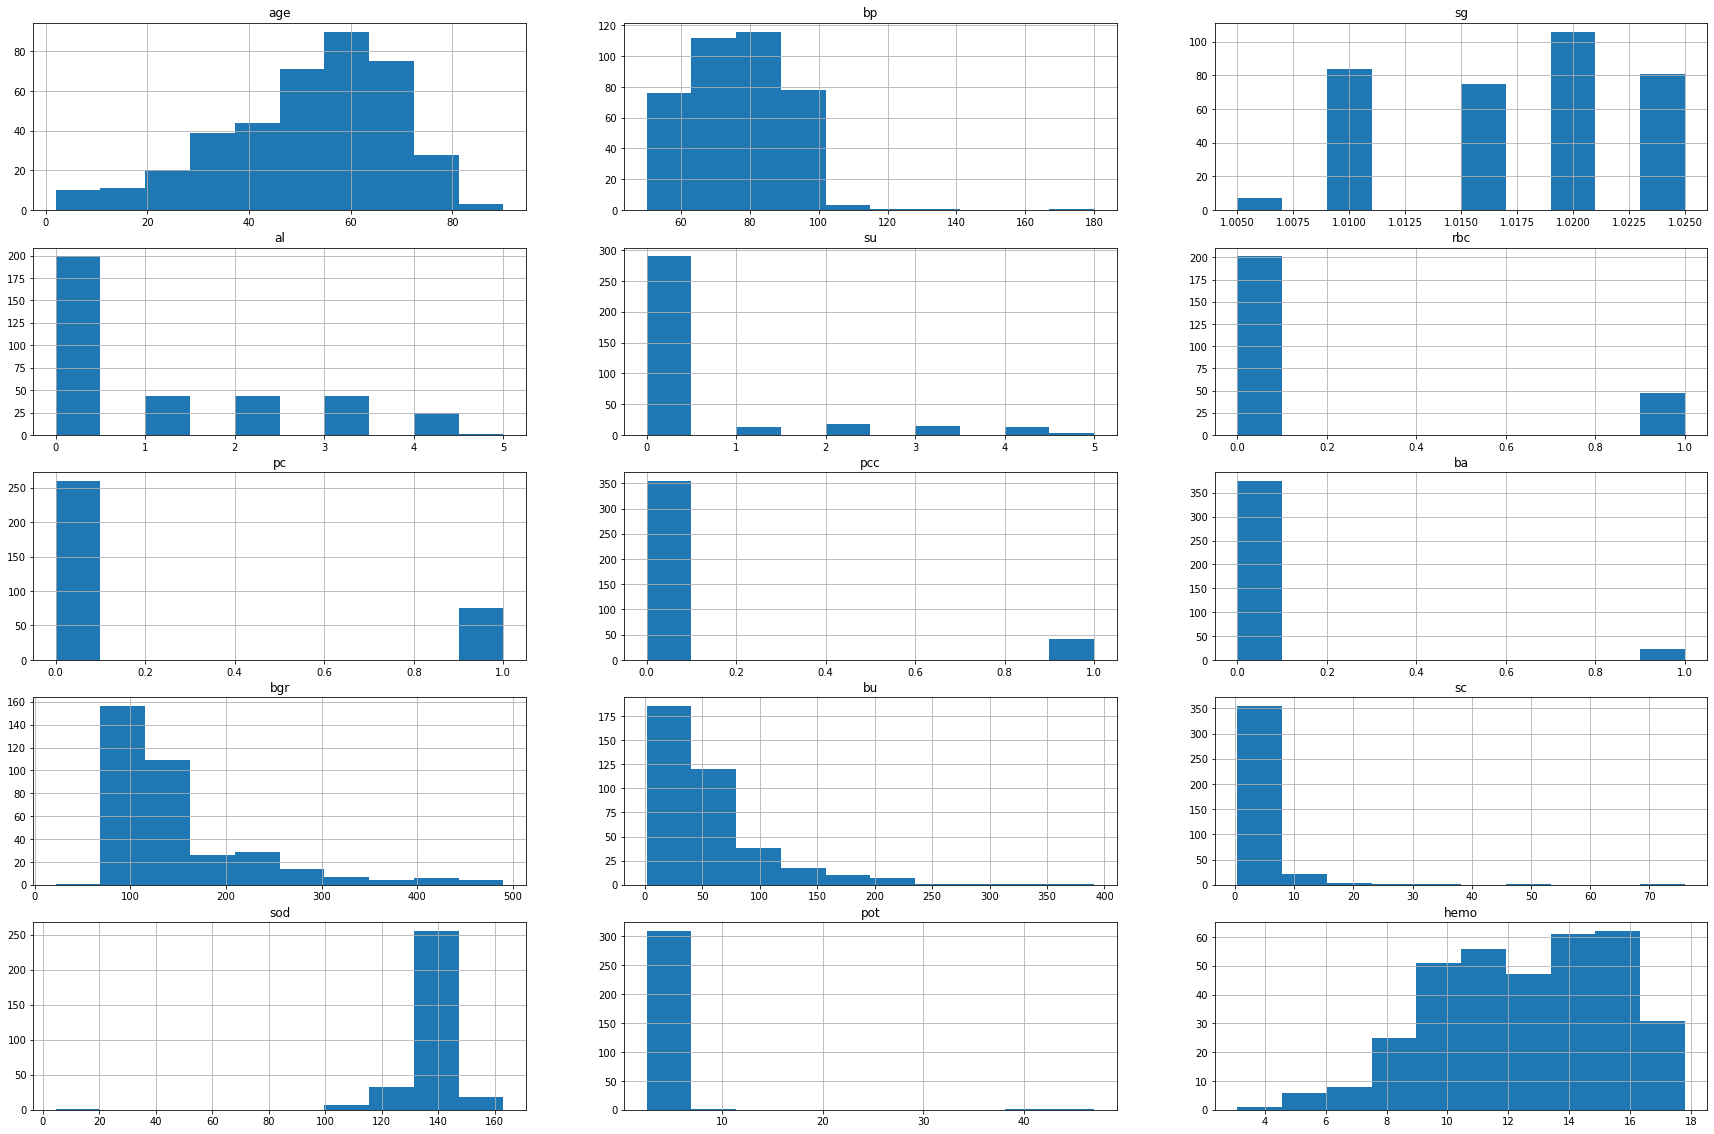

In [ ]:
plt.figure(figsize=(30,20))

for i, feature in enumerate(num_col):
    plt.subplot(5,3,i+1)
    df[feature].hist()
    plt.title(feature)

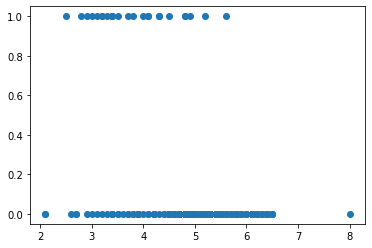

In [ ]:
plt.scatter(df1['rbcc'],df1['rbc'])

In [ ]:
df1

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,0.0,0.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,NaN,0.0,0.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,0.0,0.0,74.0,25.0,1.1,142.0,3.2,12.2,39.0,7800.0,4.4,1.0,1.0,0.0,1.0,1.0,0.0,1.0
6,68.0,70.0,1.010,0.0,0.0,NaN,0.0,0.0,0.0,100.0,54.0,24.0,104.0,4.0,12.4,36.0,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7,24.0,NaN,1.015,2.0,4.0,0.0,1.0,0.0,0.0,410.0,31.0,1.1,NaN,NaN,12.4,44.0,6900.0,5.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
8,52.0,100.0,1.015,3.0,0.0,0.0,1.0,1.0,0.0,138.0,60.0,1.9,NaN,NaN,10.8,33.0,9600.0,4.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
9,53.0,90.0,1.020,2.0,0.0,1.0,1.0,1.0,0.0,70.0,107.0,7.2,114.0,3.7,9.5,29.0,12100.0,3.7,1.0,1.0,0.0,0.0,0.0,1.0,1.0


In [ ]:
df1.corr()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
age,1.000000,0.159480,-0.191096,0.122091,0.220866,0.079987,0.150867,0.157693,0.042160,0.244992,0.196985,0.132531,-0.100046,0.058377,-0.192928,-0.242119,0.118339,-0.268896,0.400254,0.373115,0.233560,-0.163433,0.106078,0.053346,0.227268
bp,0.159480,1.000000,-0.218836,0.160689,0.222576,0.294129,0.189310,0.057891,0.111204,0.160193,0.188517,0.146222,-0.116422,0.075151,-0.306540,-0.326319,0.029753,-0.261936,0.271301,0.228267,0.085602,-0.177391,0.050610,0.197345,0.294077
sg,-0.191096,-0.218836,1.000000,-0.469760,-0.296234,-0.395774,-0.374407,-0.291618,-0.220656,-0.374710,-0.314295,-0.361473,0.412190,-0.072787,0.602582,0.603560,-0.236215,0.579476,-0.400085,-0.430574,-0.174722,0.268034,-0.293380,-0.242699,-0.732163
al,0.122091,0.160689,-0.469760,1.000000,0.269305,0.437873,0.558535,0.401284,0.368373,0.379464,0.453528,0.399198,-0.459896,0.129038,-0.634632,-0.611891,0.231989,-0.566437,0.525756,0.412779,0.268324,-0.356810,0.468895,0.321187,0.627090
su,0.220866,0.222576,-0.296234,0.269305,1.000000,0.164609,0.202815,0.151222,0.107047,0.717827,0.168583,0.223244,-0.131776,0.219450,-0.224775,-0.239189,0.184893,-0.237448,0.321933,0.523048,0.279979,-0.086890,0.139137,0.075233,0.344070
rbc,0.079987,0.294129,-0.395774,0.437873,0.164609,1.000000,0.426395,0.110282,0.180657,0.293097,0.288021,0.301159,-0.346578,-0.035086,-0.471575,-0.447670,-0.004201,-0.381538,0.306579,0.338326,0.193730,-0.282078,0.294255,0.189951,0.555097
pc,0.150867,0.189310,-0.374407,0.558535,0.202815,0.426395,1.000000,0.514578,0.329655,0.329612,0.435700,0.356734,-0.358833,0.185211,-0.541903,-0.541718,0.134303,-0.548112,0.383096,0.300832,0.215118,-0.316067,0.408850,0.329643,0.461812
pcc,0.157693,0.057891,-0.291618,0.401284,0.151222,0.110282,0.514578,1.000000,0.274491,0.208856,0.183243,0.048553,-0.180640,-0.008385,-0.285726,-0.312942,0.189944,-0.350248,0.192673,0.161753,0.186738,-0.187575,0.099773,0.174364,0.263226
ba,0.042160,0.111204,-0.220656,0.368373,0.107047,0.180657,0.329655,0.274491,1.000000,0.093582,0.157487,0.049837,-0.089411,-0.003232,-0.219461,-0.208454,0.117600,-0.231433,0.086668,0.077368,0.161461,-0.147616,0.131287,0.051001,0.185345
bgr,0.244992,0.160193,-0.374710,0.379464,0.717827,0.293097,0.329612,0.208856,0.093582,1.000000,0.143322,0.114875,-0.267848,0.066966,-0.306189,-0.301385,0.150015,-0.281541,0.390203,0.525844,0.228829,-0.184565,0.104287,0.140121,0.419672


In [ ]:
df = df.replace("?", np.nan)
df = df.replace("	?", np.nan)
df = df.fillna(method='ffill')
df = df.fillna(method='backfill')
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.020,1,0,0.0,0.0,0.0,0.0,121,36,1.2,111,2.5,15.4,44,7800,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,7,50,1.020,4,0,0.0,0.0,0.0,0.0,121,18,0.8,111,2.5,11.3,38,6000,5.2,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,62,80,1.010,2,3,0.0,0.0,0.0,0.0,423,53,1.8,111,2.5,9.6,31,7500,5.2,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,48,70,1.005,4,0,0.0,1.0,1.0,0.0,117,56,3.8,111,2.5,11.2,32,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,51,80,1.010,2,0,0.0,0.0,0.0,0.0,106,26,1.4,111,2.5,11.6,35,7300,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5,60,90,1.015,3,0,0.0,0.0,0.0,0.0,74,25,1.1,142,3.2,12.2,39,7800,4.4,1.0,1.0,0.0,1.0,1.0,0.0,1.0
6,68,70,1.010,0,0,0.0,0.0,0.0,0.0,100,54,24.0,104,4.0,12.4,36,7800,4.4,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7,24,70,1.015,2,4,0.0,1.0,0.0,0.0,410,31,1.1,104,4.0,12.4,44,6900,5,0.0,1.0,0.0,1.0,1.0,0.0,1.0
8,52,100,1.015,3,0,0.0,1.0,1.0,0.0,138,60,1.9,104,4.0,10.8,33,9600,4.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
9,53,90,1.020,2,0,1.0,1.0,1.0,0.0,70,107,7.2,114,3.7,9.5,29,12100,3.7,1.0,1.0,0.0,0.0,0.0,1.0,1.0


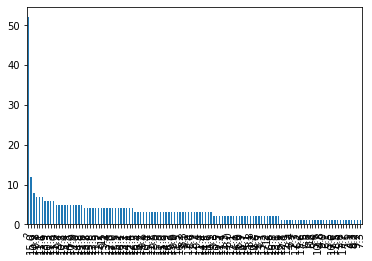

In [ ]:

pd.value_counts(df['hemo']).plot(kind='bar')